In [1]:
import pandas as pd

# Load data
df = pd.read_csv("diminos_data.csv")

# Convert timestamps
df["order_placed_at"] = pd.to_datetime(df["order_placed_at"])
df["order_delivered_at"] = pd.to_datetime(df["order_delivered_at"])

# Calculate delivery time in minutes
df["delivery_time_min"] = (
    df["order_delivered_at"] - df["order_placed_at"]
).dt.total_seconds() / 60


In [2]:
p95_delivery_time = df["delivery_time_min"].quantile(0.95)
print("95th Percentile Delivery Time:", round(p95_delivery_time, 2))


95th Percentile Delivery Time: 27.26


## Delivery Time Distribution

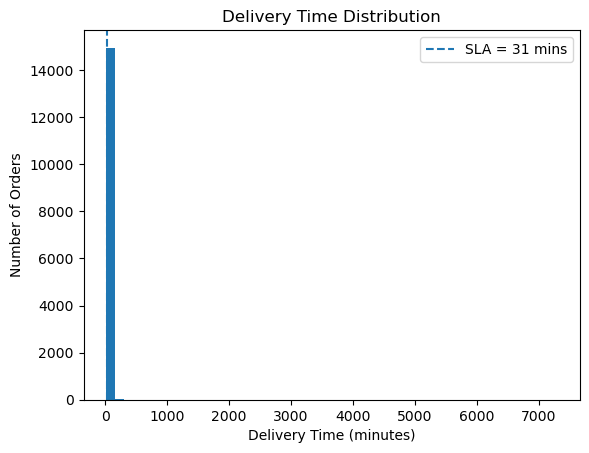

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["delivery_time_min"], bins=50)
plt.axvline(31, linestyle='--', label="SLA = 31 mins")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.title("Delivery Time Distribution")
plt.legend()
plt.show()


### Kanav is currently SAFE from losing the franchise.

In [3]:
sla_breach_percentage = (df["delivery_time_min"] > 31).mean() * 100
sla_breach_percentage


np.float64(3.713333333333333)

### Interpetation

Only ~3.7% orders are late

But these late orders directly impact the 95th percentile

A small increase can break SLA compliance


### Distribution Insight (Why Kanav Should Worry)


In [4]:
df["delivery_time_min"].describe()


count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_time_min, dtype: float64

### Key Observations

Median: ~15.8 mins (very fast)

Mean: ~20.5 mins (pulled up by delays)

Max: ~7300 mins (clear outliers)

High variance → operational instability

### Reality:
Most orders are fast, but few extreme delays are dangerous.

 ### Outlier Detection (Critical Risk Orders)

In [8]:

slow_orders = df[df["delivery_time_min"] > 60]
len(slow_orders)


170

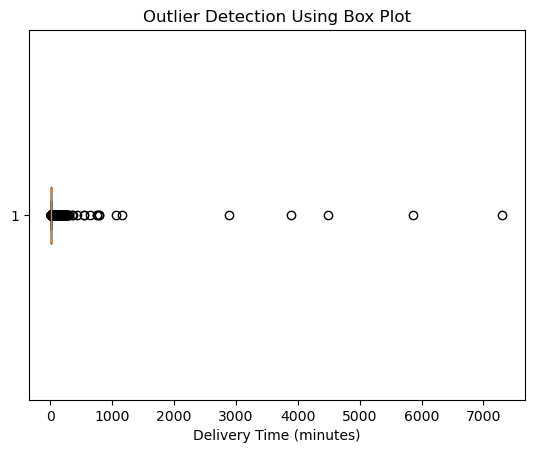

In [11]:
plt.figure()
plt.boxplot(df["delivery_time_min"], vert=False)
plt.xlabel("Delivery Time (minutes)")
plt.title("Outlier Detection Using Box Plot")
plt.show()


#### These long-delay orders:

 1.Barely affect average

 2.Heavily impact percentile metrics

 3.Are the biggest franchise risk

### Time-Based Analysis (Operational Insight)

In [7]:
df["hour"] = df["order_placed_at"].dt.hour

hourly_p95 = df.groupby("hour")["delivery_time_min"].quantile(0.95)
hourly_p95.sort_values(ascending=False).head()


hour
11    33.407016
16    32.438371
1     32.104821
13    29.714826
21    28.932870
Name: delivery_time_min, dtype: float64

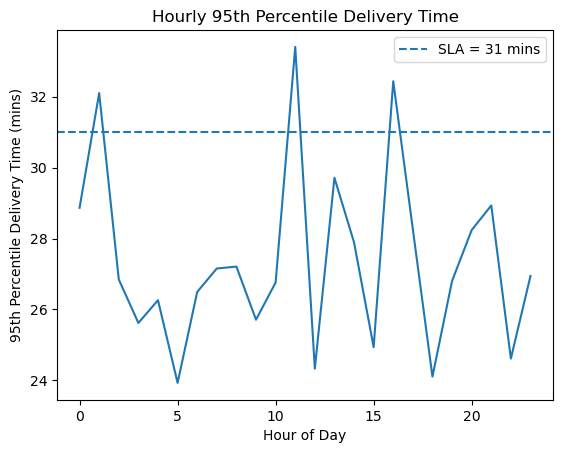

In [10]:
df["hour"] = df["order_placed_at"].dt.hour

hourly_p95 = df.groupby("hour")["delivery_time_min"].quantile(0.95)

plt.figure()
plt.plot(hourly_p95.index, hourly_p95.values)
plt.axhline(31, linestyle='--', label="SLA = 31 mins")
plt.xlabel("Hour of Day")
plt.ylabel("95th Percentile Delivery Time (mins)")
plt.title("Hourly 95th Percentile Delivery Time")
plt.legend()
plt.show()


### SLA Breach Percentage

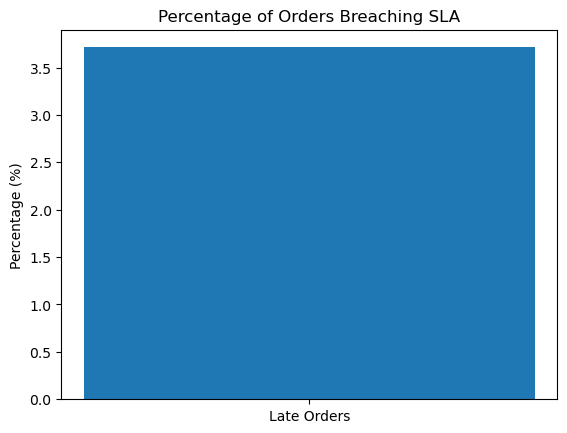

In [12]:
sla_breach = (df["delivery_time_min"] > 31).mean() * 100

plt.figure()
plt.bar(["Late Orders"], [sla_breach])
plt.ylabel("Percentage (%)")
plt.title("Percentage of Orders Breaching SLA")
plt.show()


### Insight

#### Late-night / early-morning hours likely cause:

  1. Staff shortage

  2. Delivery partner availability issues

  3. Fatigue impact

### Business Insights for Kanav (What to Do)
 #### Immediate Risks

A small spike in late orders can push p95 > 31

Outliers are silent killers of percentile-based SLAs

### Final Verdict (For Diminos Notice)

Kanav’s store is currently compliant with Diminos SLA

95th percentile delivery time = 27.26 mins (<31 mins)

However, outlier orders pose a high future risk if not controlled.